In [385]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [386]:
df = pd.read_csv("fraudTest/fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [387]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [388]:
df.shape

(555719, 23)

In [389]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [390]:
df['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [391]:
#df['state'].value_counts()

In [392]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [393]:
df = df.rename(columns = {'cc_num' : 'Card_num', 'amt': 'Amount', 'dob':'DOB', 'is_fraud':'Fraud', 'lat': 'holder_lat', 'long': 'holder_long'})
df.head()

,Unnamed: 0,trans_date_trans_time,Card_num,merchant,category,Amount,first,last,gender,street,...,holder_lat,holder_long,city_pop,job,DOB,trans_num,unix_time,merch_lat,merch_long,Fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#df.describe()

In [394]:
df = df.drop_duplicates()

In [395]:
df.shape

(555719, 23)

In [396]:
import datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [397]:
df['day'] = pd.to_datetime(df['trans_date_trans_time']).dt.day
df['month'] =  pd.to_datetime(df['trans_date_trans_time']).dt.month
df['hour'] =  pd.to_datetime(df['trans_date_trans_time']).dt.hour

In [398]:
df_num = df.select_dtypes(include = 'number')

In [399]:
df_num.corr()

,Unnamed: 0,Card_num,Amount,zip,holder_lat,holder_long,city_pop,unix_time,merch_lat,merch_long,Fraud,day,month,hour
Unnamed: 0,1.000000,-0.000823,-0.001137,0.001479,0.000336,-0.001558,-0.000794,0.997054,0.000394,-0.001586,-0.013892,0.064132,0.983187,0.000667
Card_num,-0.000823,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540,-0.001735,-0.000542,-0.001137
Amount,-0.001137,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267,-0.000829,-0.000717,-0.029860
zip,0.001479,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271,-0.000168,0.001401,0.005966
holder_lat,0.000336,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863,-0.002297,0.000686,-0.010676
holder_long,-0.001558,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972,0.000334,-0.001510,-0.001595
city_pop,-0.000794,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910,0.001938,-0.001117,0.018937
unix_time,0.997054,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066,0.044348,0.988955,-0.000304
merch_lat,0.000394,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812,-0.002302,0.000750,-0.010512
merch_long,-0.001586,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060,0.000277,-0.001526,-0.001639


<Axes: >

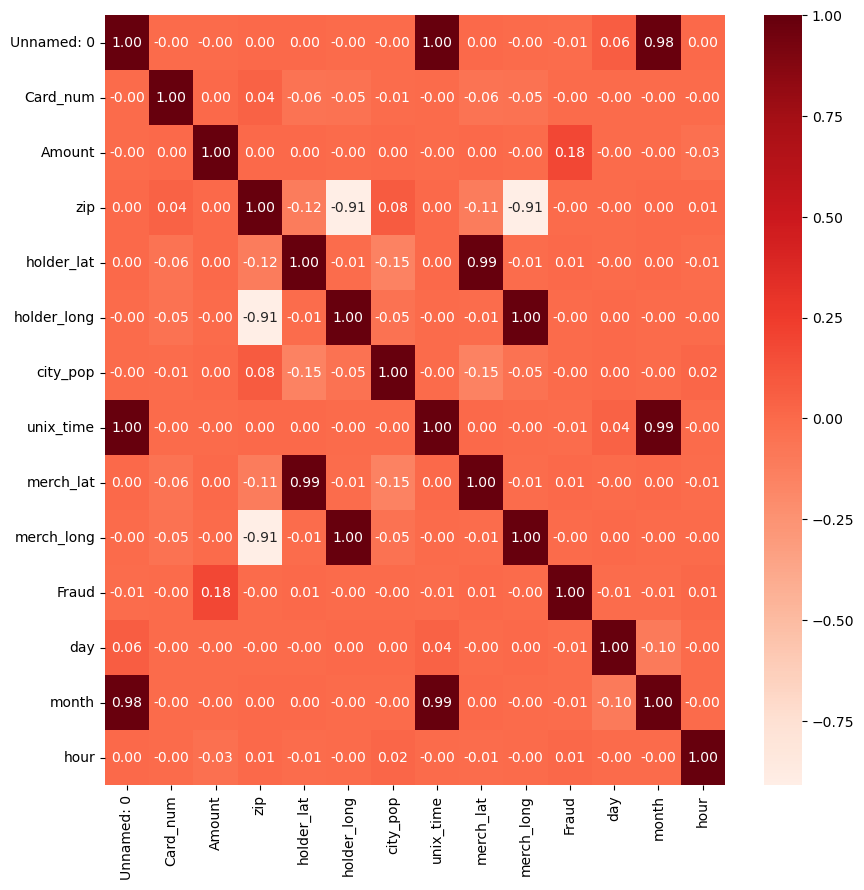

In [400]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_num.corr(), annot = True, center = 0, fmt = '.2f', cmap = 'Reds')

In [363]:
df_copy = df.copy()


In [364]:
df_copy = df_copy.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street','state', 'job', 'DOB', 'trans_num', 'city'])

In [365]:
df_copy.head()

,Card_num,merchant,category,Amount,gender,zip,holder_lat,holder_long,city_pop,unix_time,merch_lat,merch_long,Fraud,day,month,hour
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,21,6,12
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,21,6,12
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,21,6,12
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,21,6,12
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,21,6,12


In [366]:
#df_copy.groupby(['state', 'zip'])['Amount'].sum()

In [367]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#df_copy['state'] =  le.fit_transform(df_copy['state'])
df_copy['category'] = le.fit_transform(df_copy['category'])
df_copy['merchant'] = le.fit_transform(df_copy['merchant'])
df_copy['gender'] = le.fit_transform(df_copy['gender'])


#df_copy = pd.get_dummies(df_copy, columns=['category', 'state'], drop_first=True, dtype=int)

In [368]:
df_copy.head()

,Card_num,merchant,category,Amount,gender,zip,holder_lat,holder_long,city_pop,unix_time,merch_lat,merch_long,Fraud,day,month,hour
0,2291163933867244,319,10,2.86,1,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,21,6,12
1,3573030041201292,591,10,29.84,0,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,21,6,12
2,3598215285024754,611,5,41.28,0,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,21,6,12
3,3591919803438423,222,9,60.05,1,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,21,6,12
4,3526826139003047,292,13,3.19,1,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,21,6,12


In [369]:
#df_copy['transaction_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour

In [370]:
df_copy.dtypes

Card_num         int64
merchant         int32
category         int32
Amount         float64
gender           int32
zip              int64
holder_lat     float64
holder_long    float64
city_pop         int64
unix_time        int64
merch_lat      float64
merch_long     float64
Fraud            int64
day              int32
month            int32
hour             int32
dtype: object

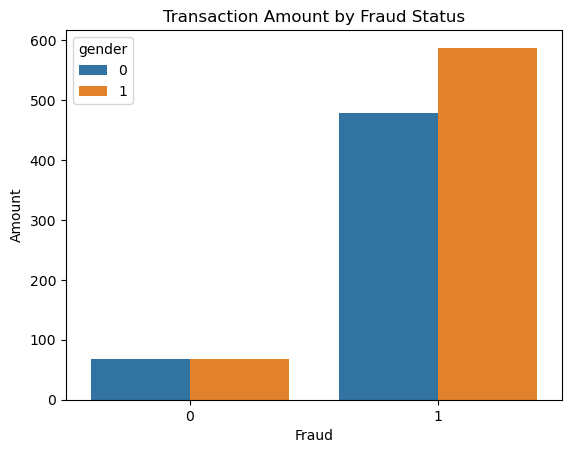

In [371]:
sns.barplot(x=df_copy['Fraud'], y=df_copy['Amount'], hue =df_copy['gender'], errorbar= None )
plt.title("Transaction Amount by Fraud Status")
plt.show()


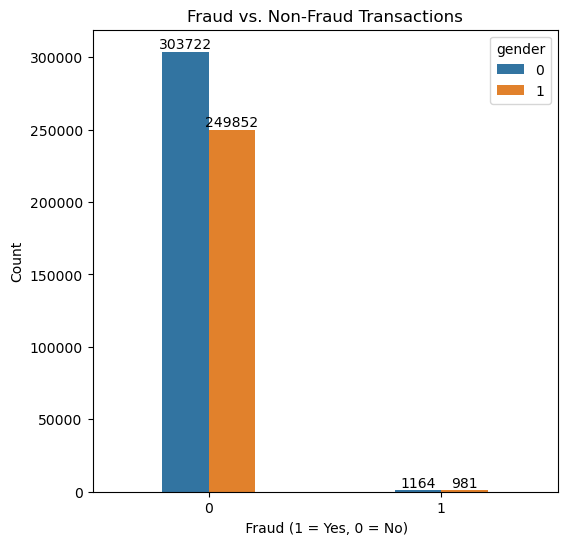

In [372]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x=df_copy["Fraud"],hue = df_copy['gender'], width = 0.4)

# Add labels automatically
ax.bar_label(ax.containers[0])

ax.bar_label(ax.containers[1])
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xlabel(" Fraud (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


In [373]:
df_copy['Fraud'].value_counts()

Fraud
0    553574
1      2145
Name: count, dtype: int64

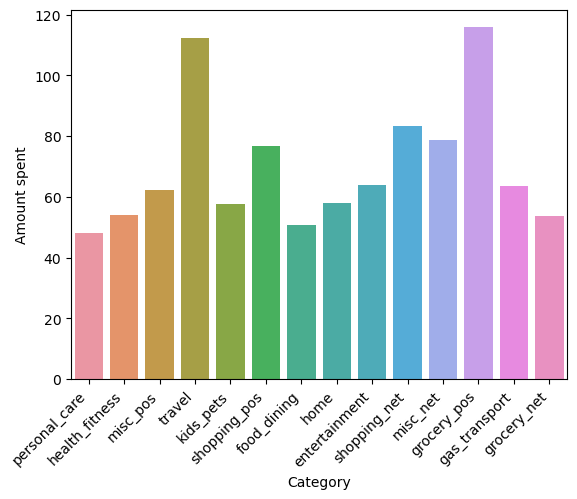

In [374]:
sns.barplot(data = df, x = 'category', y = 'Amount', errorbar = None)
plt.xlabel('Category')
plt.ylabel('Amount spent')
plt.xticks(rotation=45, ha='right')
plt.show()

In [375]:
df_copy.corr()

,Card_num,merchant,category,Amount,gender,zip,holder_lat,holder_long,city_pop,unix_time,merch_lat,merch_long,Fraud,day,month,hour
Card_num,1.000000,0.001326,-0.001779,0.001963,-0.001482,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540,-0.001735,-0.000542,-0.001137
merchant,0.001326,1.000000,0.028033,-0.003780,-0.002018,-0.000290,0.000455,0.000466,-0.000194,-0.001017,0.000743,0.000395,-0.000086,0.000933,-0.001144,-0.000171
category,-0.001779,0.028033,1.000000,0.026811,-0.027684,0.004510,-0.008215,-0.002902,0.009164,0.001097,-0.008180,-0.002967,0.016980,0.000558,0.000264,0.157214
Amount,0.001963,-0.003780,0.026811,1.000000,0.000027,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267,-0.000829,-0.000717,-0.029860
gender,-0.001482,-0.002018,-0.027684,0.000027,1.000000,-0.066467,0.042692,0.051235,-0.029367,-0.000577,0.042569,0.051203,0.000748,0.000382,-0.000445,-0.038515
zip,0.041610,-0.000290,0.004510,0.002310,-0.066467,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271,-0.000168,0.001401,0.005966
holder_lat,-0.057512,0.000455,-0.008215,0.002339,0.042692,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863,-0.002297,0.000686,-0.010676
holder_long,-0.048783,0.000466,-0.002902,-0.002046,0.051235,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972,0.000334,-0.001510,-0.001595
city_pop,-0.009414,-0.000194,0.009164,0.002760,-0.029367,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910,0.001938,-0.001117,0.018937
unix_time,-0.000810,-0.001017,0.001097,-0.000974,-0.000577,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066,0.044348,0.988955,-0.000304


### Data Standardization

In [376]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X = df_copy.drop('Fraud', axis = 1)

X_scaled = scaler.fit_transform(X)



In [377]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df_copy.drop('Fraud', axis=1).columns)

y = df_copy['Fraud']


In [378]:
### Model selection for Feature importances

In [405]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


rfe = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 42)


X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2,stratify = y,  random_state = 42)



In [406]:
## Model training
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)

In [407]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9961401425178147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



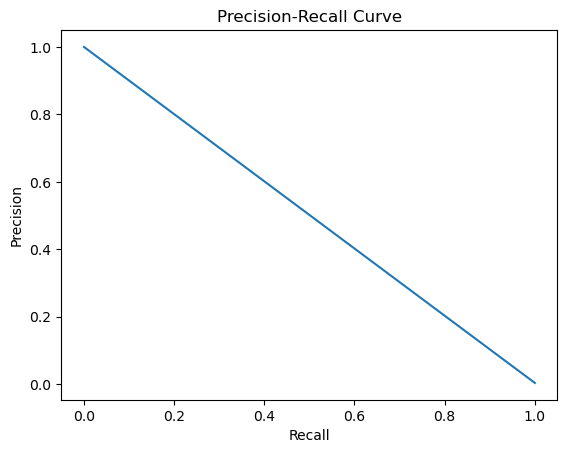

In [383]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


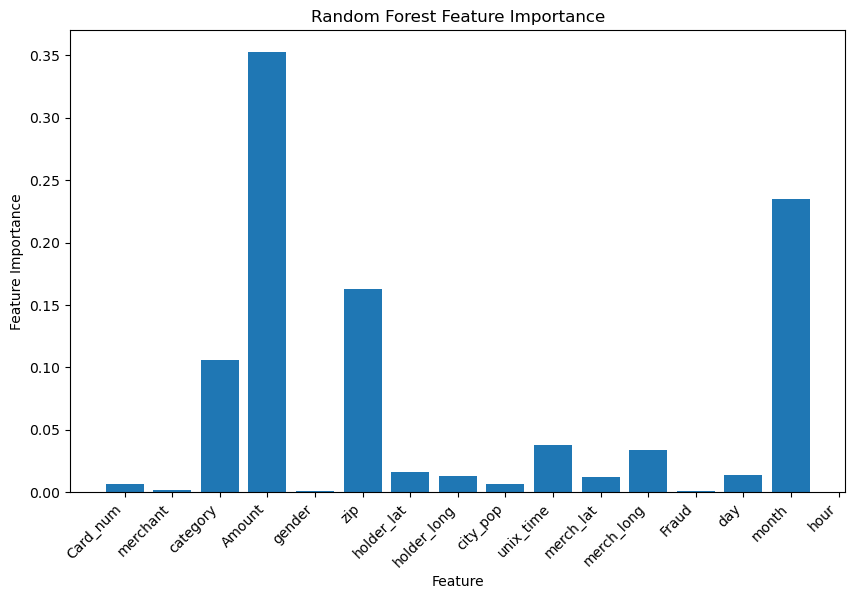

In [384]:
feature_importance = rfe.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(range(len(df_copy.columns)), df_copy.columns, rotation = 45, ha = 'right')
plt.show()


### Using DecisionTreeClassifier

In [412]:
from sklearn.tree import DecisionTreeClassifier

dce = DecisionTreeClassifier(max_depth=2, min_samples_split = 2,  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2,stratify = y,  random_state = 42)

dce.fit(X_scaled_df, y)

y_pred = dce.predict(X_test)


print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

0.996958900165551

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.73      0.34      0.46       429

    accuracy                           1.00    111144
   macro avg       0.86      0.67      0.73    111144
weighted avg       1.00      1.00      1.00    111144



In [410]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm


array([[110662,     53],
       [   285,    144]], dtype=int64)

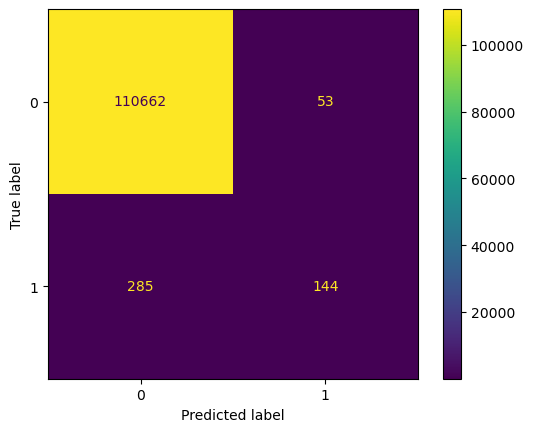

In [411]:

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()


In [420]:
from sklearn.tree import DecisionTreeClassifier

dce = DecisionTreeClassifier(max_depth=4, min_samples_split = 4,  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2,stratify = y,  random_state = 42)

dce.fit(X_scaled_df, y)

y_pred = dce.predict(X_test)


print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

0.9979755992226301

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.90      0.53      0.67       429

    accuracy                           1.00    111144
   macro avg       0.95      0.77      0.83    111144
weighted avg       1.00      1.00      1.00    111144



[[110690     25]
 [   200    229]]


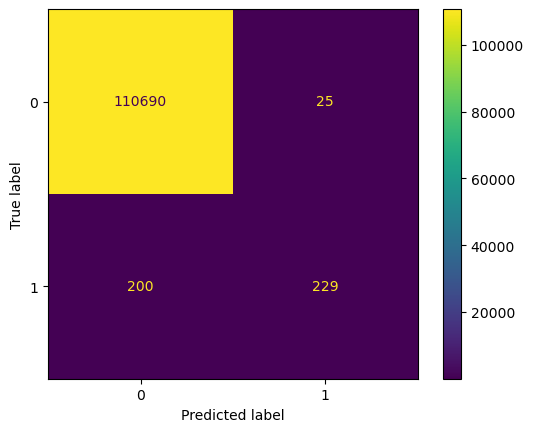

In [422]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()


### Using XGB Model

In [417]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify=y, random_state=42)
gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))


0.9968329374505146

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.84      0.22      0.35       429

    accuracy                           1.00    111144
   macro avg       0.92      0.61      0.67    111144
weighted avg       1.00      1.00      1.00    111144



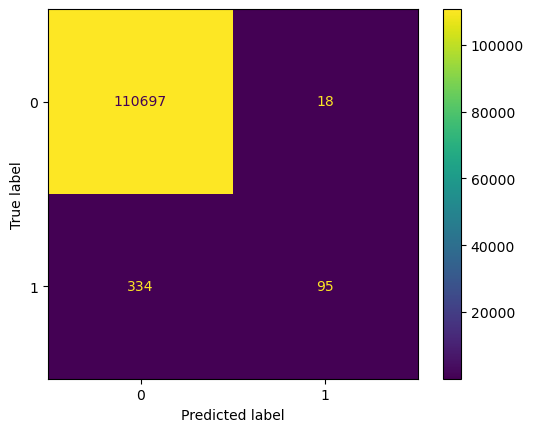

In [419]:
cm = confusion_matrix(y_test, y_pred)

cm

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()


### Using RandomForest

In [429]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def test_random_forest(n_estimators, min_samples_split, max_depth):
    rfe = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, stratify=y, random_state=42)
    rfe.fit(X_train, y_train)

    y_pred = rfe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("For Params: ", n_estimators, min_samples_split, max_depth)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    return accuracy, report, cm

# Define hyperparameter combinations
hyperparams = [(50, 2, 2),(100, 2, 2), (100, 4, 4), (200, 2, 2)]

# Test each combination
for params in hyperparams:
    test_random_forest(*params)

For Params:  50 2 2
Accuracy: 0.9961401425178147
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Confusion Matrix:
 [[110715      0]
 [   429      0]]
For Params:  100 2 2
Accuracy: 0.9961401425178147
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Confusion Matrix:
 [[110715      0]
 [   429      0]]
For Params:  100 4 4
Accuracy: 0.996176131864968
Classification Report:
               prec